In [ ]:
import pandas as pd

In [ ]:
dust = pd.read_csv('ms.csv', engine = 'python', encoding = 'cp949') # 내 데이터 따라서 cp949 될수도

In [ ]:
dust #0000-00-00 국제표준
     # 나라마다 방식이 다를 수도. 나라에 따라 읽는 방법을 맞춰야

In [ ]:
dust.info()

In [ ]:
# datetime 객체로 바꿔야

In [ ]:
# astype보다 시간 날짜 변경할때는 to_datetime

In [ ]:
pd.to_datetime(dust['날짜'])

In [ ]:
temp = pd.to_datetime(dust['날짜'])

In [ ]:
type(temp)

In [ ]:
dust['날짜'] = pd.to_datetime(dust['날짜']) #rangeindex : resample 안된다

In [ ]:
dust.info()

### 이름은 또 numpy에서 가져온다(datetime64)

In [ ]:
# date type이면 resample 가능. 시간 날짜 간ㄱ격에 따라 합칠 수 있다

In [ ]:
dust['날짜'].resample('D') # 타입에 따라 될수도 안될수도

In [ ]:
# 묶어주면 집계함수가 있어야 (마치 groupby)

In [ ]:
# 이 에러는 series 넣었으므로 에러가 나온 것
# index로 바꾸면 resample 쓸 수 있다

In [ ]:
dust.set_index('날짜', inplace = True)

In [ ]:
dust.resample('M').mean() # datetimeindex면 resample된다

In [ ]:
dust

In [ ]:
# 인덱스가 날짜로 바뀜. 그래프를 그린다면 index는 x축

In [ ]:
dust.plot.line()

In [ ]:
%matplotlib inline

In [ ]:
dust.plot.line()

In [ ]:
dust.info() #datetimeindex로 바뀜

In [ ]:
dust['2017-03':'2017-06'] # slicing도 가능

In [ ]:
dust.index.resample('3D')

In [ ]:
# 기본 옵션 : column or series 자동으로 만들어준다
# 넘파이에도 있다 arange
# 시간, 날짜 자동으로 붙여주는 애도 있다 : date_range

In [ ]:
import pandas as pd

## date_range

In [ ]:
index = pd.date_range('1/1/2000', periods = 9, freq = 'T')

In [ ]:
series = pd.Series(range(9), index = index)

In [ ]:
# 시리즈의 datetime이 

type(series)

# Fb prophet 

In [23]:
# 페이스북에서 공개한 시계열 라이브러리
# 예측분석에 많이 사용되는 사이킷런 기반으로 똑같이 설치 가능
# 먼저 관리자 프롬프트에서 gcc 설치해줘야(개오래걸림)

## 1. import

In [1]:
!pip install fbprophet

In [1]:
import pandas as pd

In [3]:
from fbprophet import Prophet

## 2. 인스턴스

In [9]:
m = Prophet()

In [5]:
m

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')

In [8]:
vars(m) 

{'growth': 'linear',
 'changepoints': None,
 'n_changepoints': 25,
 'specified_changepoints': False,
 'changepoint_range': 0.8,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'daily_seasonality': 'auto',
 'holidays': None,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'interval_width': 0.8,
 'uncertainty_samples': 1000,
 'start': None,
 'y_scale': None,
 'logistic_floor': False,
 't_scale': None,
 'changepoints_t': None,
 'seasonalities': OrderedDict(),
 'extra_regressors': OrderedDict(),
 'country_holidays': None,
 'stan_fit': None,
 'params': {},
 'history': None,
 'history_dates': None,
 'train_component_cols': None,
 'component_modes': None,
 'train_holiday_names': None}

## 3. fit

In [11]:
m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kgh67\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [12]:
vars(m)

{'growth': 'linear', 'changepoints': 93     2008-03-17
 186    2008-06-20
 279    2008-10-11
 372    2009-01-14
 465    2009-04-17
 558    2009-07-19
 650    2009-10-26
 743    2010-01-31
 836    2010-05-06
 929    2010-08-14
 1022   2010-11-15
 1115   2011-02-16
 1208   2011-05-20
 1301   2011-08-21
 1394   2011-11-24
 1487   2012-02-27
 1580   2012-05-31
 1673   2012-09-01
 1765   2012-12-02
 1858   2013-03-05
 1951   2013-06-06
 2044   2013-09-08
 2137   2013-12-10
 2230   2014-03-14
 2323   2014-06-15
 Name: ds, dtype: datetime64[ns], 'n_changepoints': 25, 'specified_changepoints': False, 'changepoint_range': 0.8, 'yearly_seasonality': 'auto', 'weekly_seasonality': 'auto', 'daily_seasonality': 'auto', 'holidays': None, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0, 'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10.0, 'mcmc_samples': 0, 'interval_width': 0.8, 'uncertainty_samples': 1000, 'start': Timestamp('2007-12-10 00:00:00'), 'y_scale': 12.84674688882

In [15]:
f = m.make_future_dataframe(periods = 365) # 미래 예측
                                                # time, timedelta, period

In [17]:
f # 새로운 데이터프레임이 생겼다

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
5,2007-12-15
6,2007-12-16
7,2007-12-17
8,2007-12-18
9,2007-12-19


In [21]:
f.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [18]:
vars(f)

{'_is_copy': None, '_data': BlockManager
 Items: Index(['ds'], dtype='object')
 Axis 1: RangeIndex(start=0, stop=3270, step=1)
 DatetimeBlock: slice(0, 1, 1), 1 x 3270, dtype: datetime64[ns], '_item_cache': {}}

In [19]:
# 값이 안 보이는 이유는 예측을 안했기 때문

In [20]:
m.predict(f)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039456,8.249007,9.451125,8.039456,8.039456,0.803072,0.803072,0.803072,0.352285,0.352285,0.352285,0.450788,0.450788,0.450788,0.0,0.0,0.0,8.842529
1,2007-12-11,8.037913,7.961063,9.222002,8.037913,8.037913,0.553160,0.553160,0.553160,0.119636,0.119636,0.119636,0.433525,0.433525,0.433525,0.0,0.0,0.0,8.591074
2,2007-12-12,8.036371,7.765140,9.007263,8.036371,8.036371,0.350539,0.350539,0.350539,-0.066659,-0.066659,-0.066659,0.417197,0.417197,0.417197,0.0,0.0,0.0,8.386909
3,2007-12-13,8.034828,7.711428,8.931077,8.034828,8.034828,0.329980,0.329980,0.329980,-0.072270,-0.072270,-0.072270,0.402250,0.402250,0.402250,0.0,0.0,0.0,8.364808
4,2007-12-14,8.033285,7.750104,8.960704,8.033285,8.033285,0.319516,0.319516,0.319516,-0.069572,-0.069572,-0.069572,0.389088,0.389088,0.389088,0.0,0.0,0.0,8.352801
5,2007-12-15,8.031742,7.479730,8.714126,8.031742,8.031742,0.066362,0.066362,0.066362,-0.311711,-0.311711,-0.311711,0.378072,0.378072,0.378072,0.0,0.0,0.0,8.098104
6,2007-12-16,8.030199,7.823058,9.054458,8.030199,8.030199,0.417798,0.417798,0.417798,0.048291,0.048291,0.048291,0.369507,0.369507,0.369507,0.0,0.0,0.0,8.447997
7,2007-12-17,8.028656,8.130405,9.372308,8.028656,8.028656,0.715923,0.715923,0.715923,0.352285,0.352285,0.352285,0.363638,0.363638,0.363638,0.0,0.0,0.0,8.744579
8,2007-12-18,8.027114,7.893044,9.089970,8.027114,8.027114,0.480283,0.480283,0.480283,0.119636,0.119636,0.119636,0.360647,0.360647,0.360647,0.0,0.0,0.0,8.507396
9,2007-12-19,8.025571,7.713769,8.942102,8.025571,8.025571,0.293993,0.293993,0.293993,-0.066659,-0.066659,-0.066659,0.360652,0.360652,0.360652,0.0,0.0,0.0,8.319564


In [27]:
x = m.predict(f)

In [22]:
m.predict(f)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203217,7.501004,8.924163
3266,2017-01-16,8.528203,7.808002,9.244331
3267,2017-01-17,8.315601,7.568440,9.027884
3268,2017-01-18,8.148207,7.455283,8.908220
3269,2017-01-19,8.160103,7.449755,8.911282


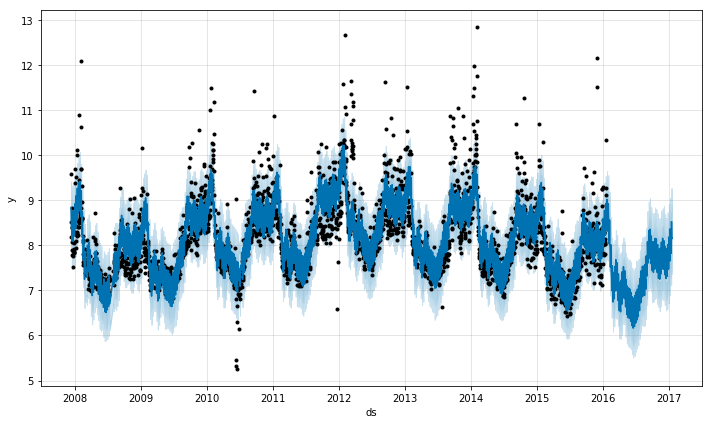

In [25]:
fig1 = m.plot(m.predict(f)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

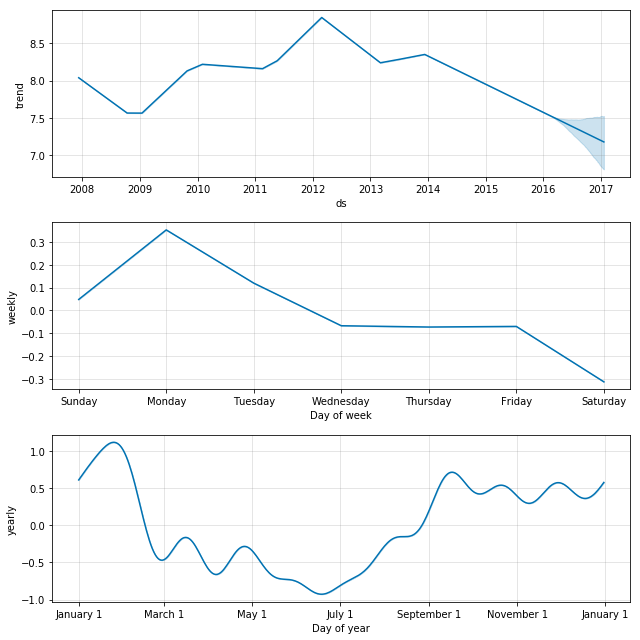

In [28]:
fig2 = m.plot_components(x)